<a href="https://colab.research.google.com/github/kanhaiyap/chest-x-ray-abnormalities-prediction/blob/main/chest_x_ray_abnormalities_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# code to convert dicom to jpeg is available from https://www.kaggle.com/sunghyunjun/vinbigdata-1024-jpg-dataset

In [4]:
os.listdir('./drive/MyDrive/university/archive')

['train.csv', '.DS_Store', 'test', 'train']

ecda8c2d80adc70ee958fcb0361c3286.jpg


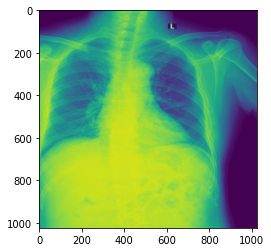

In [5]:
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float
# import pydicom as dicom
# import pydicom
from skimage.transform import resize
import cv2
train='./drive/MyDrive/university/archive/train'
arr=[]
for img in os.listdir(train):
    data = cv2.imread(os.path.join(train,img))
    data=cv2.cvtColor(data,cv2.COLOR_BGR2GRAY)
    # data=exposure.equalize_adapthist(data/np.max(data))
    print(img)
    
#     data=ds.pixel_array
    arr.append(data)
    #resized_img = resize(data, (2500, 2500), anti_aliasing=True)
    #print(resized_img.shape)
    #print(label)
    plt.imshow(data)
    plt.show()
    #print(len(arr))
    break
 
  

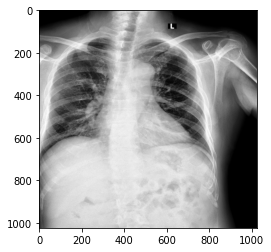

In [6]:
exp=exposure.equalize_adapthist(arr[0]/np.max(arr[0]))
plt.imshow(exp,cmap='gray')


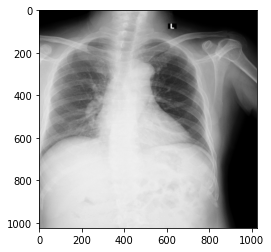

In [7]:
src = cv2.GaussianBlur(arr[0], (3, 3), 0)
plt.imshow(src,cmap='gray')


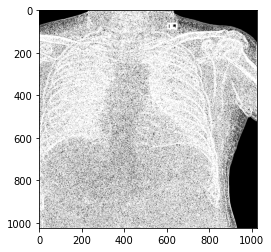

In [8]:
dst = cv2.Laplacian(src, cv2.CV_32F, ksize=7)
abs_dst = cv2.convertScaleAbs(dst)
plt.imshow(abs_dst,cmap='gray')

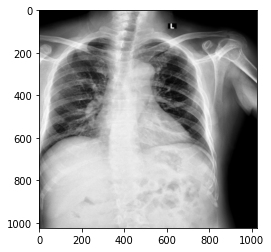

In [9]:
kernel = np.array([[20,-10,20], [-5,9,-7], [40,10,50]])
im = cv2.filter2D(exp,-1, kernel)
plt.imshow(im,cmap='gray')

100.0


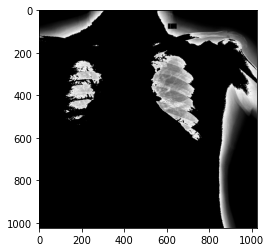

In [10]:
ret, thresh = cv2.threshold(arr[0],100,255,100)
plt.imshow(thresh,cmap='gray')
print(ret)

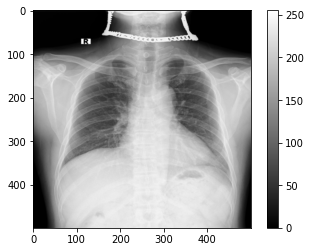

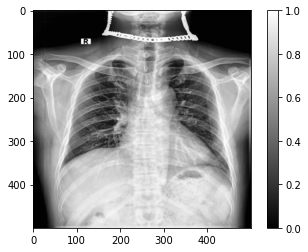

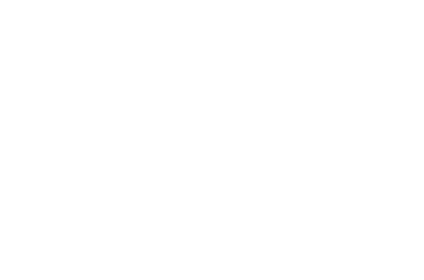

In [11]:
import matplotlib.pyplot as plt
# import pydicom as dicom
# import pydicom
from skimage.transform import resize
import cv2

data_dir="./drive/MyDrive/university/archive/"
img_size=500




images_list = sorted(os.listdir(os.path.join(data_dir, 'train')))
arr = []

for image in (images_list[:1]):
  image_path = os.path.join(data_dir, 'train',image)
  data=cv2.imread(image_path)
  image_array = cv2.resize(data , (img_size,img_size), interpolation = cv2.INTER_AREA)
  image_array1=cv2.cvtColor(image_array,cv2.COLOR_BGR2GRAY)
  exposed=exposure.equalize_adapthist(image_array1/np.max(image_array1))
  
  arr.append(exposed)
 
  plt.imshow(image_array,cmap='gray')
  plt.colorbar()
  plt.show()

  plt.imshow(exposed,cmap='gray')
  plt.colorbar()
  plt.show()
  plt.axis('off')

  
  # break

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


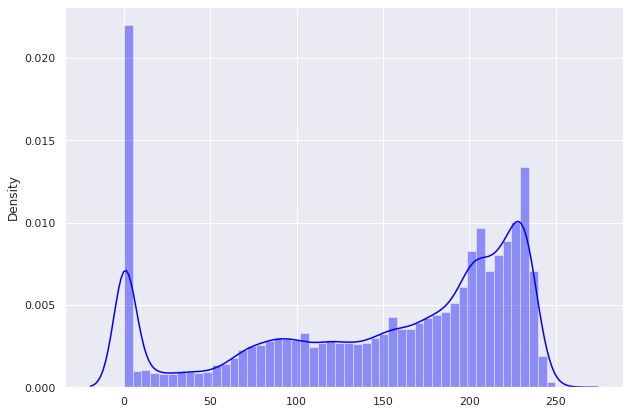

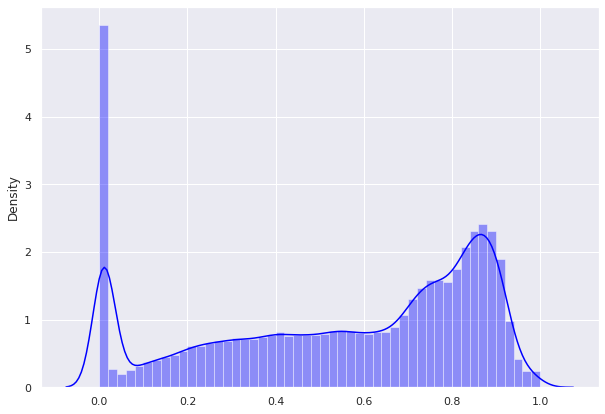

In [12]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 7))
sns.distplot(image_array1.ravel(),color='blue', kde=True)

import seaborn as sns
sns.set()
plt.figure(figsize=(10, 7))
sns.distplot(exposed.ravel(),color='blue', kde=True)


In [13]:
arr=np.array(arr,dtype='float32')

In [14]:
arr=arr.reshape(-1,img_size,img_size,1)

In [15]:
# plt.imshow(arr[1].reshape(180,180))


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
                                  rescale=1./255.,
                                  # rotation_range = 20,
                                  brightness_range=[0.4,1.0],
                                  # width_shift_range = 0.2,
                                  # height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  # zoom_range = [0.7,1],
                                  samplewise_center=True, #Set each sample mean to 0.
                                  samplewise_std_normalization= True, # Divide each input by its standard deviation
                                 

                                  horizontal_flip = True,
                                 )

In [17]:
X=train_datagen.flow(arr, batch_size=1)

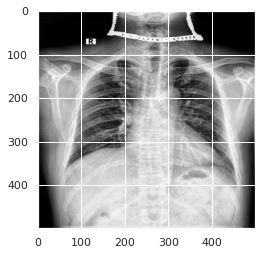

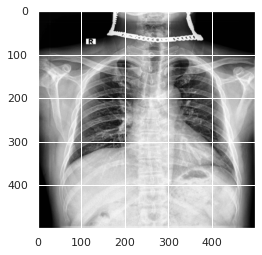

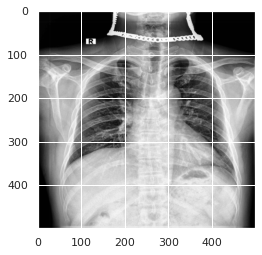

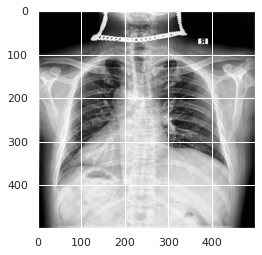

In [18]:

from matplotlib import pyplot

for i in range(4):
  Y = X.next()
  # print(Y)
  plt.imshow(Y.reshape(img_size, img_size), cmap=pyplot.get_cmap('gray'))
  plt.show()

pyplot.show()



In [19]:

import pandas as pd
data_df=pd.read_csv('./drive/MyDrive/university/archive/train.csv')
data_df.fillna(0,inplace=True)
data_df.head()

,Unnamed: 0,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,raw_x_min,raw_x_max,raw_y_min,raw_y_max,raw_width,raw_height,scale_x,scale_y
0,0,78aa8415fbf1c792f7d7c53349d44d4f,No finding,14,R16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0.341333,0.341333
1,1,78aa8415fbf1c792f7d7c53349d44d4f,No finding,14,R17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0.341333,0.341333
2,2,78aa8415fbf1c792f7d7c53349d44d4f,No finding,14,R11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0.341333,0.341333
3,3,183015e171f5159d7e60d43578632a3f,Aortic enlargement,0,R8,567.0,295.0,671.0,417.0,1134.0,1342.0,721.0,1019.0,2048.0,2500.0,0.500000,0.409600
4,4,183015e171f5159d7e60d43578632a3f,Pleural thickening,11,R9,58.0,794.0,116.0,851.0,117.0,232.0,1938.0,2077.0,2048.0,2500.0,0.500000,0.409600


In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  67914 non-null  int64  
 1   image_id    67914 non-null  object 
 2   class_name  67914 non-null  object 
 3   class_id    67914 non-null  int64  
 4   rad_id      67914 non-null  object 
 5   x_min       67914 non-null  float64
 6   y_min       67914 non-null  float64
 7   x_max       67914 non-null  float64
 8   y_max       67914 non-null  float64
 9   raw_x_min   67914 non-null  float64
 10  raw_x_max   67914 non-null  float64
 11  raw_y_min   67914 non-null  float64
 12  raw_y_max   67914 non-null  float64
 13  raw_width   67914 non-null  float64
 14  raw_height  67914 non-null  float64
 15  scale_x     67914 non-null  float64
 16  scale_y     67914 non-null  float64
dtypes: float64(12), int64(2), object(3)
memory usage: 8.8+ MB


In [21]:
data_df['class_id'].value_counts()

14    31818
0      7162
3      5427
11     4842
13     4655
8      2580
7      2483
10     2476
9      2203
6      1247
5      1000
2       960
4       556
1       279
12      226
Name: class_id, dtype: int64

In [22]:
# data_df=df.drop(df[df['class_id']==14].index)

In [23]:
# data_df=data_df.reset_index(drop=True)

In [24]:
data_df['class_id'].value_counts()

14    31818
0      7162
3      5427
11     4842
13     4655
8      2580
7      2483
10     2476
9      2203
6      1247
5      1000
2       960
4       556
1       279
12      226
Name: class_id, dtype: int64

In [25]:
# import pandas as pd


# num_class=df['class_id'].value_counts() 
# temp=pd.DataFrame()

# for cl in num_class.index:
#     temp=temp.append(df[df['class_id']==cl].sample(min(num_class)))

# data_df=temp 
# del temp, num_class
      


In [26]:
data_df['class_id'].value_counts()

14    31818
0      7162
3      5427
11     4842
13     4655
8      2580
7      2483
10     2476
9      2203
6      1247
5      1000
2       960
4       556
1       279
12      226
Name: class_id, dtype: int64

In [27]:
# from skimage import data, exposure, img_as_float
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import matplotlib
# from PIL import Image
# data=arr[0]

# bbox = [df[df['image_id'] == '9a5094b2563a1ef3ff50dc5c7ff71345'].iloc[0,5],
#         df[df['image_id'] == '9a5094b2563a1ef3ff50dc5c7ff71345'].iloc[0,6],
#         df[df['image_id'] == '9a5094b2563a1ef3ff50dc5c7ff71345'].iloc[0,7],
#         df[df['image_id'] == '9a5094b2563a1ef3ff50dc5c7ff71345'].iloc[0,8]]
# fig, ax = plt.subplots(1, 1, figsize=(20, 4))
# ax.imshow(data.reshape(img_size,img_size), cmap='gray')

# p = matplotlib.patches.Rectangle((bbox[0], bbox[1]),
#                                  bbox[2]-bbox[0],
#                                  bbox[3]-bbox[1],
#                                  ec='g', fc='none', lw=2.)

# # data = exposure.equalize_hist(data)
# ax.add_patch(p)
# #plt.imshow(data,'gray')
# plt.show()

In [28]:
# from pydicom import dcmread
# from pydicom.pixel_data_handlers.util import apply_voi_lut
# def read_xray(path, voi_lut = True, fix_monochrome = True):
#     dicom = pydicom.read_file(path)
    
#     # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
#     if voi_lut:
#         data = apply_voi_lut(dicom.pixel_array, dicom)
#     else:
#         data = dicom.pixel_array
               
#     # depending on this value, X-ray may look inverted - fix that:
#     if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
#         data = np.amax(data) - data
    
#     data = data - np.min(data)
#     data = data / np.max(data)
#     data = (data * 255).astype(np.uint8)
    
        
#     return data

In [29]:
data_df

,Unnamed: 0,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,raw_x_min,raw_x_max,raw_y_min,raw_y_max,raw_width,raw_height,scale_x,scale_y
0,0,78aa8415fbf1c792f7d7c53349d44d4f,No finding,14,R16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0.341333,0.341333
1,1,78aa8415fbf1c792f7d7c53349d44d4f,No finding,14,R17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0.341333,0.341333
2,2,78aa8415fbf1c792f7d7c53349d44d4f,No finding,14,R11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0.341333,0.341333
3,3,183015e171f5159d7e60d43578632a3f,Aortic enlargement,0,R8,567.0,295.0,671.0,417.0,1134.0,1342.0,721.0,1019.0,2048.0,2500.0,0.500000,0.409600
4,4,183015e171f5159d7e60d43578632a3f,Pleural thickening,11,R9,58.0,794.0,116.0,851.0,117.0,232.0,1938.0,2077.0,2048.0,2500.0,0.500000,0.409600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67909,67909,bdd8423e5deae0ae5dc7e0547887fafc,Aortic enlargement,0,R9,434.0,236.0,584.0,385.0,976.0,1314.0,665.0,1084.0,2304.0,2880.0,0.444444,0.355556
67910,67910,bdd8423e5deae0ae5dc7e0547887fafc,Lung Opacity,7,R9,174.0,121.0,389.0,200.0,391.0,875.0,339.0,563.0,2304.0,2880.0,0.444444,0.355556
67911,67911,bdd8423e5deae0ae5dc7e0547887fafc,Pleural thickening,11,R9,174.0,121.0,389.0,200.0,391.0,875.0,339.0,563.0,2304.0,2880.0,0.444444,0.355556
67912,67912,bdd8423e5deae0ae5dc7e0547887fafc,Pleural effusion,10,R9,78.0,394.0,417.0,683.0,175.0,939.0,1109.0,1920.0,2304.0,2880.0,0.444444,0.355556


In [30]:
from tqdm import tqdm_notebook
import time
img_size=150
 

data_dir="./drive/MyDrive/university/archive/"

class_names = sorted(data_df['class_name'].unique())
print(f"No. of classes read - {len(class_names)}")
time.sleep(1)

images_list = sorted(os.listdir(os.path.join(data_dir, 'train')))
X = []
Y = []


# kernel = np.array([[2,-1,2], [-0.5,9,-0.7], [4,4,4]])
for image in tqdm_notebook(images_list):
    cls_index = data_df[data_df['image_id'] == image[:-4]]['class_id']
    image_path = os.path.join(data_dir, 'train',image)
    data=cv2.imread(image_path)
    image_array = cv2.resize(data , (img_size,img_size), interpolation = cv2.INTER_AREA)
    image_array=cv2.cvtColor(image_array,cv2.COLOR_BGR2GRAY)
    # image_array=exposure.equalize_adapthist(image_array/np.max(image_array))
    image_array = cv2.filter2D(image_array,-1, kernel)
    for i in cls_index:
      X.append(image_array)
      Y.append(i)
    data_df=data_df.drop(data_df[data_df['image_id']==image[:-4]].index)
    data_df=data_df.reset_index(drop=True)
       
  

No. of classes read - 15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [31]:
len(Y)

67914

In [32]:
X1=np.concatenate(X,axis=0)

In [33]:
type(X1)

numpy.ndarray

In [34]:
y1=np.array(Y)

In [35]:
X1.shape

(10187100, 150)

In [36]:
X1=X1.reshape(-1,img_size,img_size,1)

In [37]:
X1.shape

(67914, 150, 150, 1)

In [38]:
print(len(X), len(Y))

67914 67914


In [39]:
import gc
del(X)
del(Y)
print(X1.shape, y1.shape)
gc.collect()

(67914, 150, 150, 1) (67914,)


8866

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten,MaxPooling2D,Activation, Conv2D,BatchNormalization, Dense, GlobalAveragePooling2D, Lambda, Dropout, InputLayer, Input
from tensorflow.keras.utils import to_categorical


In [41]:
print(tf.__version__)

2.4.1


In [42]:
X1.shape[1:]

(150, 150, 1)

In [43]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, \
val_labels,= train_test_split( X1, 
                y1, test_size = 0.1, 
                random_state = 1,
                shuffle=True)

print('Total Training Images: {}, Total Test Images: {}'.format(
    len(train_images), 
    len(val_images)
    ))

Total Training Images: 61122, Total Test Images: 6792


In [44]:
import gc
del(X1)
del(y1)
print(train_images.shape, train_labels.shape)
gc.collect()

(61122, 150, 150, 1) (61122,)


50

In [45]:
model = tf.keras.applications.ResNet50( input_shape=train_images.shape[1:], 
    include_top=False, 
    weights=None
    )

In [46]:
base_model_output=model.output

flattened_output = Flatten()(base_model_output)

class_prediction = Dense(256, activation="relu")(flattened_output)
# class_prediction = Dense(256, activation="relu")(class_prediction )
class_prediction = Dropout(0.7)(class_prediction)
# class_prediction = Dense(126, activation="relu")(class_prediction)
# class_prediction = Dropout(0.7)(class_prediction )
# class_prediction = Dense(42, activation="relu")(class_prediction)
class_prediction = Dense(14, activation='softmax',
                             name="class_output")(class_prediction)


In [47]:
import tensorflow
loss_fn = tensorflow.keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_fn,
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
op = Model(inputs=model.input, outputs= class_prediction)


In [49]:
op.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [50]:

from tensorflow.keras.callbacks import EarlyStopping
losses = { 
    "class_output": "sparse_categorical_crossentropy"
    }

loss_weights = {
    "class_output": 1.3
    }

metrics = {
    'class_output': 'accuracy', 
    }

stop = EarlyStopping(monitor = "val_loss", min_delta = 0.1, patience = 5, 
                    restore_best_weights = True
                     )


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.2, 
                              patience = 30, min_lr = 1e-7, verbose = 1)


opt = tf.keras.optimizers.Adam(learning_rate=0.02)


op.compile(optimizer = opt, loss = losses, loss_weights = loss_weights, 
    metrics = metrics)

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
val_datagen=ImageDataGenerator(rescale=1./255.0,
                                samplewise_center=True, #Set each sample mean to 0.
                                  samplewise_std_normalization= True, # Divide each input by its standard deviation
                                 )

In [55]:
# history=op.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=60),
#   validation_data=val_datagen.flow(val_images, val_labels), steps_per_epoch=len(train_images)//60,
#   epochs=5,callbacks=[stop])

In [56]:
del op
gc.collect()

736

In [57]:
from tensorflow.keras.applications import densenet
from tensorflow.keras import regularizers
chex=densenet.DenseNet121(include_top=False,weights=None,input_shape=train_images.shape[1:])

base_model1_output=chex.output

flattened_output = Flatten()(base_model1_output)

class_prediction = Dense(256, activation="relu",kernel_initializer='glorot_uniform')(flattened_output)

class_prediction = Dropout(0.1)(class_prediction )
class_prediction = Dense(256, activation="relu")(class_prediction)


class_prediction = Dense(256, activation="relu")(class_prediction)

class_prediction = Dropout(0.4)(class_prediction )

class_prediction = Dense(15, activation='softmax',
                             name="class_output")(class_prediction)


In [59]:
op1 = Model(inputs=chex.input, outputs= class_prediction)

In [60]:

from tensorflow.keras.callbacks import EarlyStopping


metrics = {
    'class_output': 'accuracy', 
 
    }

stop = EarlyStopping(monitor = "val_loss", min_delta = 0.001, patience = 5, 
                    restore_best_weights = True
                     )


opt = tf.keras.optimizers.Adam(learning_rate=0.0001)



op1.compile(optimizer = opt, loss = "SparseCategoricalCrossentropy", #loss_weights = 0.8, 
    metrics = metrics)

In [61]:
history1=op1.fit(train_datagen.flow(train_images, train_labels, batch_size=60),
  validation_data=val_datagen.flow(val_images, val_labels), steps_per_epoch=len(train_images)//60,
  epochs=100,
  callbacks=[stop]
  )

Epoch 1/100
1018/1018 [==============================] - 191s 177ms/step - loss: 1.8603 - accuracy: 0.4738 - val_loss: 1.7700 - val_accuracy: 0.4747
Epoch 2/100
1018/1018 [==============================] - 177s 174ms/step - loss: 1.6368 - accuracy: 0.5036 - val_loss: 1.6081 - val_accuracy: 0.4979
Epoch 3/100
1018/1018 [==============================] - 177s 174ms/step - loss: 1.5841 - accuracy: 0.5121 - val_loss: 1.6260 - val_accuracy: 0.4903
Epoch 4/100
1018/1018 [==============================] - 177s 174ms/step - loss: 1.5500 - accuracy: 0.5199 - val_loss: 1.5890 - val_accuracy: 0.4963
Epoch 5/100
1018/1018 [==============================] - 177s 174ms/step - loss: 1.5334 - accuracy: 0.5197 - val_loss: 1.5661 - val_accuracy: 0.5015
Epoch 6/100
1018/1018 [==============================] - 177s 174ms/step - loss: 1.5022 - accuracy: 0.5268 - val_loss: 1.5554 - val_accuracy: 0.5088
Epoch 7/100
1018/1018 [==============================] - 177s 174ms/step - loss: 1.4728 - accuracy: 0.5319

In [ ]:

# del op1
# gc.collect()
# tf.reset_default_graph()

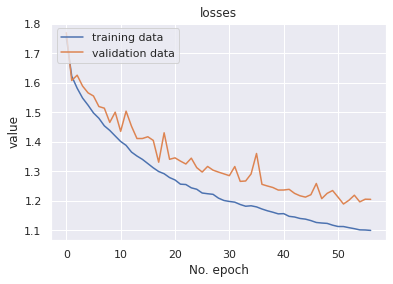

In [62]:
plt.plot(history1.history['loss'], label='training data')
plt.plot(history1.history['val_loss'], label='validation data')
plt.title('losses')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [63]:
model3 = tf.keras.applications.VGG16( input_shape=train_images.shape[1:], 
    include_top=False, 
    weights=None
    )

In [64]:
base_model_output1=model3.output

flattened_output = Flatten()(base_model_output1)

class_prediction = Dense(256, activation="relu")(flattened_output)
class_prediction = Dense(256, activation="relu")(class_prediction )
class_prediction = Dropout(0.7)(class_prediction)
class_prediction = Dense(126, activation="relu")(class_prediction)
class_prediction = Dropout(0.2)(class_prediction )
class_prediction = Dense(256, activation="relu")(class_prediction)
class_prediction = Dense(15, activation='softmax',
                             name="class_output")(class_prediction)

In [65]:
op2 = Model(inputs=model3.input, outputs= class_prediction)

In [66]:

from tensorflow.keras.callbacks import EarlyStopping
losses = { 
   
    "class_output": "sparse_categorical_crossentropy"
    }

loss_weights = {
   
    "class_output": 0.5
    }

metrics = {
    'class_output': 'accuracy', 
 
    }

stop = EarlyStopping(monitor = "val_loss", min_delta = 0.1, patience = 5, 
                    restore_best_weights = True
                     )


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.2, 
                              patience = 5, min_lr = 1e-7, verbose = 1)


opt = tf.keras.optimizers.Adam(learning_rate=0.01)


op2.compile(optimizer = opt, loss = losses, loss_weights = loss_weights, 
    metrics = metrics)

In [ ]:
history2=op2.fit(train_datagen.flow(train_images, train_labels, batch_size=32),
  validation_data=train_datagen.flow(val_images, val_labels), steps_per_epoch=len(train_images)//32,
  epochs=50,callbacks=[stop]
  )

In [ ]:
# del op2
# gc.collect()
# tf.reset_default_graph()